In [52]:
import warnings
warnings.filterwarnings(action='ignore')
from pandas import read_csv,merge,concat,melt
import sys
import seaborn as sb
from matplotlib import pyplot as plt

In [53]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [54]:
origin = read_csv('../../파일/한열/임시데이터/19년도.csv',encoding='euc-kr')
origin1 = read_csv('../../파일/한열/임시데이터/20년도.csv',encoding='euc-kr')
origin2 = read_csv('../../파일/한열/임시데이터/21년도.csv',encoding='euc-kr')

In [55]:
df = concat([origin,origin1,origin2],ignore_index=True)
df['대분류']=df['업종명 대분류']
df

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자,대분류
0,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,50.0,여성,11000,646,음식점업,2020-12-15,음식점업
1,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,70.0,여성,60000,646,음식점업,2020-12-15,음식점업
2,2019-01,서귀포시,도심,서홍동,I56114,서양식 음식점업,내국인,단체,60.0,여성,68000,646,음식점업,2020-12-15,음식점업
3,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,40.0,여성,50000,646,음식점업,2020-12-15,음식점업
4,2019-01,서귀포시,도심,월평동,I56114,서양식 음식점업,내국인,개별,50.0,남성,56000,646,음식점업,2020-12-15,음식점업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219069,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.0,여성,7800,189,소매업,2021-07-26,소매업
1219070,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26,소매업
1219071,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26,소매업
1219072,2021-05,서귀포시,도심,동홍동,G47121,슈퍼마켓,기타외국,단체,NaN,알수없음,340730,189,소매업,2021-07-26,소매업


In [56]:
df['대분류'].unique()
'''
금액을 이용자수로 나눠서 평균을 구한다
업종별 금액을 더해서 변화량의 추이를 본다 ( 전년도 대비 등)
전체적으로 유사한 변화가 보이는 경우 해당 년도/월에 특이사항이 있었는지 확인한다.
한 두개의 튀는 데이터는 해당 업종의 호재/악재가 있었는지 확인한다.


'''

'\n금액을 이용자수로 나눠서 평균을 구한다\n업종별 금액을 더해서 변화량의 추이를 본다 ( 전년도 대비 등)\n전체적으로 유사한 변화가 보이는 경우 해당 년도/월에 특이사항이 있었는지 확인한다.\n한 두개의 튀는 데이터는 해당 업종의 호재/악재가 있었는지 확인한다.\n\n\n'

In [57]:
df1 = df.query('관광구분 != "도민"')
df1

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자,대분류
0,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,50.0,여성,11000,646,음식점업,2020-12-15,음식점업
1,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,70.0,여성,60000,646,음식점업,2020-12-15,음식점업
2,2019-01,서귀포시,도심,서홍동,I56114,서양식 음식점업,내국인,단체,60.0,여성,68000,646,음식점업,2020-12-15,음식점업
3,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,40.0,여성,50000,646,음식점업,2020-12-15,음식점업
4,2019-01,서귀포시,도심,월평동,I56114,서양식 음식점업,내국인,개별,50.0,남성,56000,646,음식점업,2020-12-15,음식점업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219068,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.0,여성,9100,189,소매업,2021-07-26,소매업
1219070,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26,소매업
1219071,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26,소매업
1219072,2021-05,서귀포시,도심,동홍동,G47121,슈퍼마켓,기타외국,단체,NaN,알수없음,340730,189,소매업,2021-07-26,소매업


In [68]:
df1 = origin.copy()
df1['업종명'].unique()


숙박 = ['여관업', '휴양콘도 운영업', '호텔업'] 
식비 = ['서양식 음식점업', '일식 음식점업','비알콜 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '기타 외국식 음식점업','한식 음식점업','중식 음식점업', '기타 주점업','체인화 편의점',  '일반유흥 주점업','육류 소매업',
       '그외 기타 종합 소매업','빵 및 과자류 소매업','과실 및 채소 소매업','기타음식료품위주종합소매업', '수산물 소매업']
교통 = ['내항 여객 운송업','자동차 임대업','정기 항공 운송업','차량용 주유소 운영업',  '차량용 가스 충전업','택시 운송업']
기타 = ['그외 기타 분류안된 오락관련 서비스업', '기타 수상오락 서비스업','골프장 운영업', '면세점', '욕탕업', '기타 대형 종합 소매업','그외 기타 스포츠시설 운영업',  '마사지업','관광 민예품 및 선물용품 소매업', '건강보조식품 소매업','스포츠 및 레크레이션 용품 임대업', '전시 및 행사 대행업','기타 갬블링 및 베팅업', '화장품 및 방향제 소매업','여행사업']




In [69]:
df1['분류'] = '기타'
df1.loc[df1['업종명'] == '여관업','분류'] = '숙박'
df1.loc[df1['업종명'] == '휴양콘도 운영업','분류'] = '숙박'
df1.loc[df1['업종명'] == '호텔업','분류'] = '숙박'

df1.loc[df1['업종명'] == '서양식 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '일식 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '비알콜 음료점업','분류'] = '식비'
df1.loc[df1['업종명'] == '피자, 햄버거, 샌드위치 및 유사 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '기타 외국식 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '한식 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '중식 음식점업','분류'] = '식비'
df1.loc[df1['업종명'] == '기타 주점업','분류'] = '식비'
df1.loc[df1['업종명'] == '체인화 편의점','분류'] = '식비'
df1.loc[df1['업종명'] == '일반유흥 주점업','분류'] = '식비'
df1.loc[df1['업종명'] == '육류 소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '그외 기타 종합 소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '빵 및 과자류 소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '과실 및 채소 소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '기타음식료품위주종합소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '수산물 소매업','분류'] = '식비'

df1.loc[df1['업종명'] == '내항 여객 운송업','분류'] = '교통'
df1.loc[df1['업종명'] == '자동차 임대업','분류'] = '교통'
df1.loc[df1['업종명'] == '정기 항공 운송업','분류'] = '교통'
df1.loc[df1['업종명'] == '차량용 주유소 운영업','분류'] = '교통'
df1.loc[df1['업종명'] == '차량용 가스 충전업','분류'] = '교통'
df1.loc[df1['업종명'] == '택시 운송업','분류'] = '교통'

In [70]:
df1

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자,분류
0,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,50.0,여성,11000,646,음식점업,2020-12-15,식비
1,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,70.0,여성,60000,646,음식점업,2020-12-15,식비
2,2019-01,서귀포시,도심,서홍동,I56114,서양식 음식점업,내국인,단체,60.0,여성,68000,646,음식점업,2020-12-15,식비
3,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,40.0,여성,50000,646,음식점업,2020-12-15,식비
4,2019-01,서귀포시,도심,월평동,I56114,서양식 음식점업,내국인,개별,50.0,남성,56000,646,음식점업,2020-12-15,식비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508083,2019-12,제주시,도심,도련일동,I56111,한식 음식점업,내국인,단체,40.0,여성,854300,6909,음식점업,2020-12-15,식비
508084,2019-12,제주시,읍면,한경면,I55112,여관업,내국인,개별,50.0,남성,50000,2042,숙박업,2020-12-15,숙박
508085,2019-12,제주시,도심,도련이동,I56111,한식 음식점업,제주도민,도민,10.0,여성,46500,6909,음식점업,2020-12-15,식비
508086,2019-12,제주시,도심,도련일동,I56111,한식 음식점업,내국인,단체,30.0,남성,2224800,6909,음식점업,2020-12-15,식비


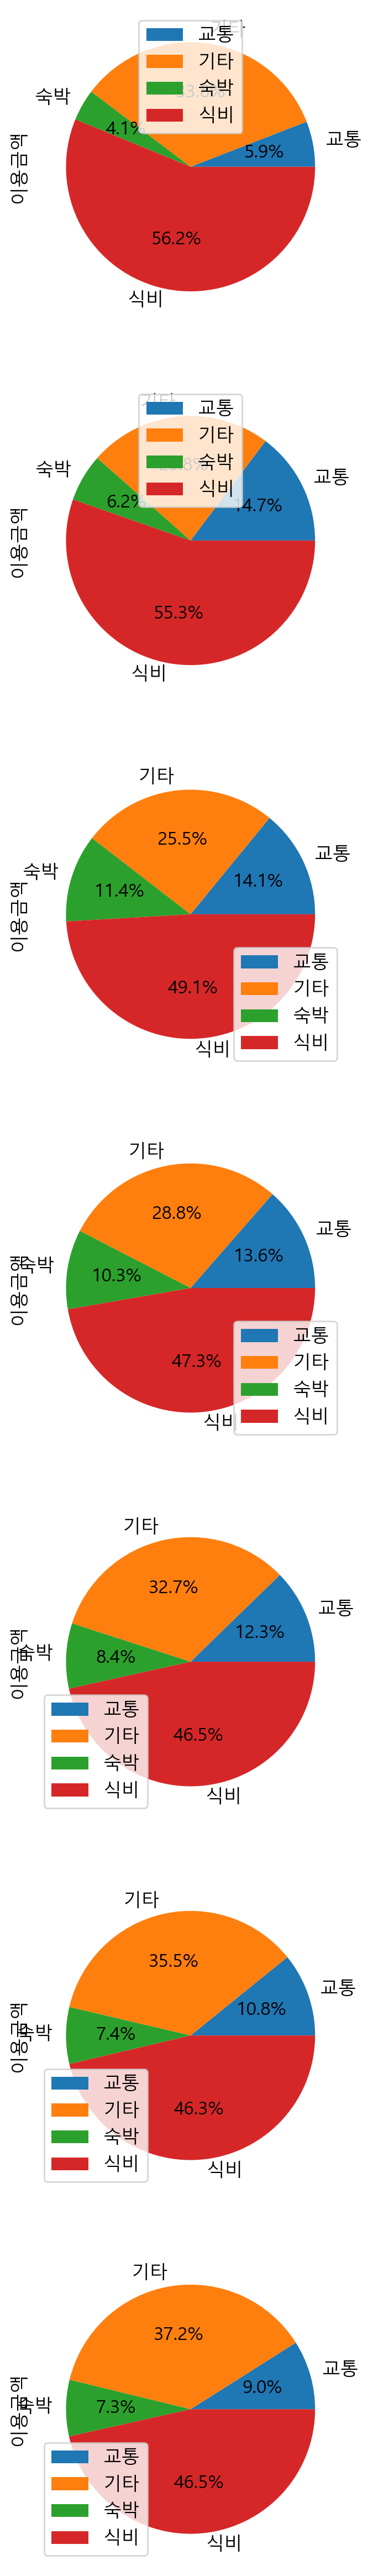

In [61]:
fig, ax = plt.subplots(7,1, figsize = (10,30))
for i,v in enumerate(ax):
    a = (i+1)*10
    df1[['분류','연령대','이용금액']].query(f'연령대 == {a}').groupby('분류').sum().drop('연령대',axis=1).plot(kind='pie',subplots=True,autopct = '%0.1f%%',ax=v)


plt.show()
plt.close()

In [71]:
df2=df1[['이용금액','분류']].groupby('분류').sum()

<Figure size 2400x1200 with 0 Axes>

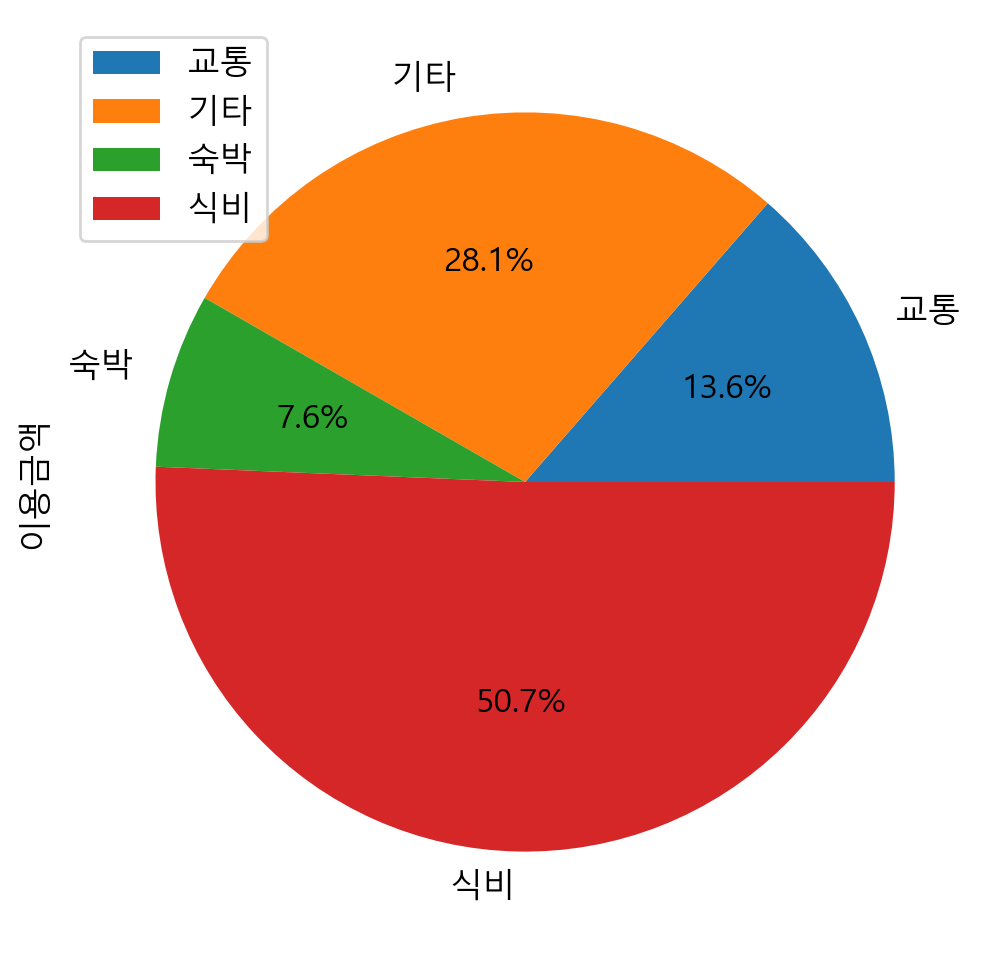

In [72]:
plt.figure()
df2.plot(kind='pie',autopct='%0.1f%%',subplots=True)
plt.show()
plt.close()

In [64]:
(df1.query('대분류 == "서비스업"'))['업종명'].unique()

array(['그외 기타 분류안된 오락관련 서비스업', '기타 수상오락 서비스업', '여행사업', '골프장 운영업', '욕탕업',
       '그외 기타 스포츠시설 운영업', '마사지업', '전시 및 행사 대행업', '기타 갬블링 및 베팅업'],
      dtype=object)

In [65]:
df1[['이용금액','대분류','연령대']].groupby(['연령대','대분류']).sum()

이용금액
연령대  대분류               
10.0 서비스업      97380485
     소매업     1528376222
     숙박업      109437460
     운송업      110961642
     음식점업     779041351
     임대업       54593661
20.0 서비스업    4360051934
     소매업    90389148107
     숙박업    13071144224
     운송업    16738929852
     음식점업   79829408541
     임대업     7553272275
30.0 서비스업   11153676419
     소매업   143993355494
     숙박업    38870477421
     운송업    22221340994
     음식점업  113560290505
     임대업    11764151886
40.0 서비스업   18185734953
     소매업   146950931171
     숙박업    34756977426
     운송업    18087302572
     음식점업  106925953919
     임대업    11880403111
50.0 서비스업   23534891261
     소매업   136852958377
     숙박업    25843540158
     운송업    12580418621
     음식점업   97079263935
     임대업    10009681485
60.0 서비스업   14522268415
     소매업    71015424529
     숙박업    10921702479
     운송업     4375968322
     음식점업   43377635738
     임대업     4367114162
70.0 서비스업    4392685802
     소매업    17968214190
     숙박업     2694318911
     운송업      857228824
     음식점업   10099751008
     임대업      882249244

In [74]:
# df1 = df.query('대분류 == "음식점업"')
# df2 = df1.query('년월>="2019-01"')
# df2